In [2]:
import os
import pandas as pd
import numpy as np
from datetime import date
from sklearn.model_selection import train_test_split
from random import random
from keras.utils import np_utils
from matplotlib import pyplot as plt



In [7]:
!unzip ml-100k.zip
!ls

'unzip' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
genres = []
with open('ml-100k/u.genre', 'r') as f:
    for genre in f:
        genres.append(genre.split('|')[0])

In [9]:
merge_cols = ['user id', 'movie id', 'rating', 'timestamp']
item_cols = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL'] + genres[:-1]
user_cols = ['user id', 'age', 'gender', 'occupation', 'zip code']



In [10]:
#import the data files onto dataframes
users = pd.read_csv('ml-100k/u.user', sep='|', names=user_cols, encoding='latin-1')
item = pd.read_csv('ml-100k/u.item', sep='|', names=item_cols, encoding='latin-1')
data = pd.read_csv('ml-100k/u.data', sep='\t', names=merge_cols, encoding='latin-1')

In [12]:
users.head(10)


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [13]:
item.head(10)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:

data.head(10)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [17]:
movielens=pd.merge(data,item)
movielens=pd.merge(movielens,users)
movielens.head(10)

,user id,movie id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,0,0,0,49,M,writer,55105
5,196,202,3,881251728,Groundhog Day (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Groundhog%20D...,0,0,...,0,1,0,0,0,0,49,M,writer,55105
6,196,153,5,881251820,"Fish Called Wanda, A (1988)",01-Jan-1988,NaN,http://us.imdb.com/M/title-exact?Fish%20Called...,0,0,...,0,0,0,0,0,0,49,M,writer,55105
7,196,286,5,881250949,"English Patient, The (1996)",15-Nov-1996,NaN,http://us.imdb.com/M/title-exact?English%20Pat...,0,0,...,0,1,0,0,1,0,49,M,writer,55105
8,196,66,3,881251911,While You Were Sleeping (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?While%20You%2...,0,0,...,0,1,0,0,0,0,49,M,writer,55105
9,196,845,4,881251954,That Thing You Do! (1996),28-Sep-1996,NaN,http://us.imdb.com/M/title-exact?That%20Thing%...,0,0,...,0,0,0,0,0,0,49,M,writer,55105


In [18]:
movielens.shape

(100000, 31)

In [19]:
users.describe()


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [20]:
item.describe()


,movie id,video release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:

data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [24]:
item.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


### Top 25 rated movies

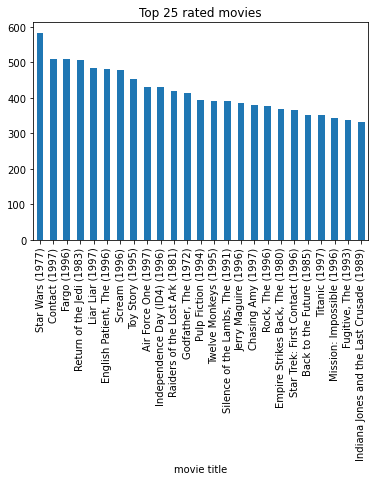

In [27]:
most_rated=movielens.groupby('movie title').size().sort_values(ascending=False)[:25]
most_rated.plot(kind="bar",title="Top 25 rated movies",label="count")

In [29]:
movie_stat = movielens.groupby('movie title').agg({'rating':[np.size,np.mean]})
movie_stat.sort_values([('rating','mean')],ascending=False).head()

rating     
                                             size mean
movie title                                           
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

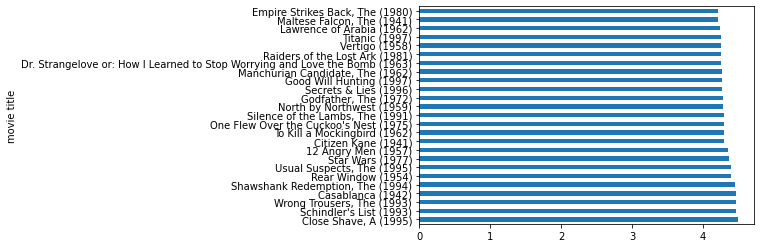

In [30]:
most100=movie_stat['rating']['size'] >= 100
most_rated_mean=movie_stat[most100].sort_values([('rating', 'mean')], ascending=False)
most_rated_mean['rating']['mean'].sort_values(ascending=False)[:25].plot(kind="barh")

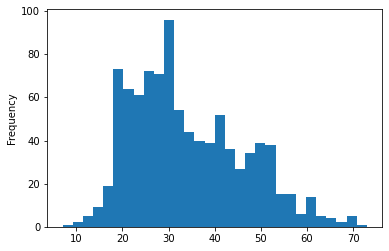

In [31]:
users.age.plot.hist(bins=30)
plt.xlabel=("Age")
plt.ylabel=("count")
plt.title=("Age distribution")


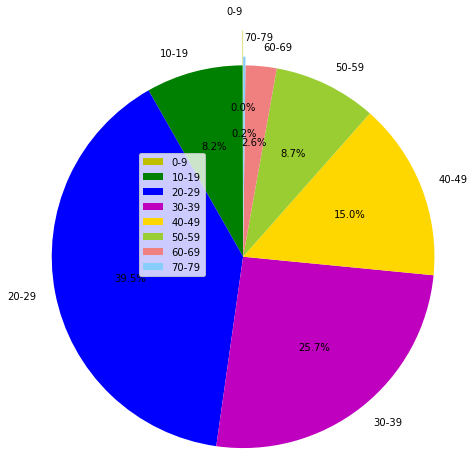

In [32]:
labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
movielens['age_group'] = pd.cut(movielens.age, range(0, 81, 10), right=False, labels=labels)
distage=movielens.groupby('age_group').agg({'rating':[np.size,np.mean]})
colors=["y","g","b","m",'gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(distage['rating']['size'],startangle=90,labels=labels,colors=colors,explode=(0.4,0,0,0,0,0,0,0.1),autopct = '%1.1f%%',radius=2.2)
plt.legend()
plt.show()

In [37]:
item[item["release date"].isna()]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
item.drop(index=266, inplace=True)

In [39]:
for genre in item.columns[5:]:
    print(item[genre].value_counts(), end="\n\n")

0    1680
1       1
Name: unknown, dtype: int64

0    1430
1     251
Name: Action, dtype: int64

0    1546
1     135
Name: Adventure, dtype: int64

0    1639
1      42
Name: Animation, dtype: int64

0    1559
1     122
Name: Children's, dtype: int64

0    1176
1     505
Name: Comedy, dtype: int64

0    1572
1     109
Name: Crime, dtype: int64

0    1631
1      50
Name: Documentary, dtype: int64

0    956
1    725
Name: Drama, dtype: int64

0    1659
1      22
Name: Fantasy, dtype: int64

0    1657
1      24
Name: Film-Noir, dtype: int64

0    1589
1      92
Name: Horror, dtype: int64

0    1625
1      56
Name: Musical, dtype: int64

0    1620
1      61
Name: Mystery, dtype: int64

0    1434
1     247
Name: Romance, dtype: int64

0    1580
1     101
Name: Sci-Fi, dtype: int64

0    1430
1     251
Name: Thriller, dtype: int64

0    1610
1      71
Name: War, dtype: int64

0    1654
1      27
Name: Western, dtype: int64



In [40]:
item[item["unknown"] == 1]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1372,1373,Good Morning (1971),4-Feb-1971,NaN,http://us.imdb.com/M/title-exact?Good%20Mornin...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
item.drop(index=1372, axis=0, inplace=True)
item.drop(['unknown', 'video release date', 'IMDb URL'], axis=1, inplace=True)
item

,movie id,movie title,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
jobs = []
with open('ml-100k/u.occupation', 'r') as f:
    for job in f:
        jobs.append(job)

In [43]:
df_user_data_merge = pd.merge(users, data)
grouped_df1 = df_user_data_merge.groupby('movie id')
temp_df = pd.DataFrame(columns=['movie id', 'count_male', 'count_female', 'average_age', 'average_rating'])
for i in grouped_df1:
    vals = i[1]['gender'].value_counts()
    m, f = 0, 0
    if 'M' in vals:
        m = vals['M']
    if 'F' in vals:
        f = vals['F']
    temp_df.loc[len(temp_df.index)] = [i[0], m/1.0, f/1.0, i[1]['age'].mean(), str(round(i[1]['rating'].mean()))]
    

In [44]:
temp_df['average_rating'].value_counts()

3    769
4    541
2    283
1     78
5     11
Name: average_rating, dtype: int64

# The data in the rating column is heavily skewed for classification, with maximum values being in the range [2, 4].
## - To work around this, we can combine the date in three categories,
- 'GOOD' : Movies having rating > 3
- 'AVERAGE' : Movies havinf rating = 3
- 'BAD' : Movies having rating < 3

In [52]:
DATE_OFFSET = date(1922, 1, 1)
MONTHS = {'Jan': 1,'Feb': 2,'Mar': 3,'Apr': 4,'May': 5, 'Jun': 6, 'Jul': 7,'Aug': 8,'Sep': 9,'Oct': 10,'Nov': 11,'Dec': 12}
RATING_MAPPER = {1: 'BAD', 2: 'BAD', 3: 'AVERAGE', 4: 'GOOD', 5: 'GOOD'}
ARGMAX_MAPPER = {0: 'BAD', 1: 'AVERAGE', 2: 'GOOD'}
REVERSE_ARGMAX_MAPPER = {'BAD': 0, 'AVERAGE': 1, 'GOOD': 2}

# Activation Functions and their derivatives here 

In [53]:
def linear(X):
    return 0.1 * X

def sigmoid(X):
    return 1.0/(1.0 + np.exp(-X))

def relu(X):
    return np.maximum(0, X)

def tanh(X):
    return 2.0 * sigmoid(2.0 * X) - 1.0

def leaky_relu(X):
    return np.maximum(0.001 * X, X)

def softmax(X):
    return np.exp(X)/np.sum(np.exp(X))

def d_linear(X):
    return 0.1

def d_sigmoid(X):
    return (1.0 - sigmoid(X)) * sigmoid(X)

def d_relu(X):
    return 1.0 * (X > 0)

def d_tanh(X):
    return 1.0 - tanh(X) ** 2

def d_leaky_relu(X):
    d = np.zeros_like(X)
    d[X <= 0] = 0.001
    d[X > 0] = 1
    return d

def d_softmax(X):
    return (1 - softmax(X)) * softmax(X)

activations = {'softmax': (softmax, d_sigmoid), 'linear': (linear, d_linear), 'sigmoid': (sigmoid, d_sigmoid), 'tanh': (tanh, d_tanh), 'relu': (relu, d_relu), 'leaky_relu': (leaky_relu, d_leaky_relu)}

# Loss function. (Only MSE here)

In [54]:
def cross_entropy(y_true, y_pred):
    return -np.sum(np.dot(np.log(y_pred), y_true.T))

def d_cross_entropy(y_true, y_pred):
    return (y_pred - y_true) / y_true.size

def mse(y_true, y_pred):
    return np.mean(np.array(y_true - y_pred) ** 2)

def d_mse(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

#  The Neural Net Layers and Model code

In [55]:
class Layer:
    def __init__(self):
        self.input_vec = None
        self.output = None

    def forward_prop(self, input):
        pass

    def back_prop(self, db, lr):
        pass

class DenseLayer(Layer):
    def __init__(self, input_size, output_size):
        self.w = np.random.rand(input_size, output_size) - random()
        self.b = np.random.rand(1, output_size) - random()
    
    def forward_prop(self, input):
        self.input_vec = input
        self.output = np.dot(self.input_vec, self.w) + self.b
        return self.output

    def back_prop(self, db, lr):
        input_err = np.dot(db, self.w.T)
        dw = np.dot(self.input_vec.T, db)
        self.w -= lr * dw
        self.b -= lr * db
        return input_err

class Activation(Layer):
    def __init__(self, activation):
        self.activation, self.d_activation = activation

    def forward_prop(self, input_data):
        self.input_vec = input_data
        self.output = self.activation(self.input_vec)
        return self.output

    def back_prop(self, db, lr):
        return self.d_activation(self.input_vec) * db

class Model:
    def __init__(self):
        self.layers = []
        self.loss_over_epochs = []
        self.loss = None
        self.d_loss = None

    def add(self, layer):
        self.layers.append(layer)

    def use(self, loss, d_loss):
        self.loss = loss
        self.d_loss = d_loss

    def fit(self, x_train, y_train, epochs, learning_rate):
        samples = len(x_train)
        for i in range(epochs):
            err = 0
            for sample, y in zip(x_train, y_train):
                output = sample
                for layer in self.layers:
                    output = layer.forward_prop(output)
                loss = self.loss(y, output)
                error = self.d_loss(y, output)
                for layer in reversed(self.layers):
                    error = layer.back_prop(error, learning_rate)

            loss /= samples
            self.loss_over_epochs.append(loss)
            print('epoch {}/{}   loss={:.10f}'.format(i+1, epochs, loss))
    
    def predict(self, test_data):
        samples = len(test_data)
        result = []
        for i in test_data:
            output = i
            for l_n, layer in enumerate(self.layers):
                output = layer.forward_prop(output)
            result.append(output)
            
        return result

In [62]:
temp_df['average_rating'] = temp_df["average_rating"].apply(lambda x : RATING_MAPPER[x])

KeyError: 'GOOD'

In [230]:
temp_df

,movie id,count_male,count_female,average_age,average_rating
0,1,333.0,119.0,31.955752,GOOD
1,2,112.0,19.0,29.312977,AVERAGE
2,3,74.0,16.0,27.011111,AVERAGE
3,4,164.0,45.0,32.593301,GOOD
4,5,64.0,22.0,29.930233,AVERAGE
...,...,...,...,...,...
1677,1678,1.0,0.0,17.000000,BAD
1678,1679,1.0,0.0,17.000000,AVERAGE
1679,1680,1.0,0.0,17.000000,BAD
1680,1681,1.0,0.0,28.000000,AVERAGE


In [231]:
dataset = pd.merge(item, temp_df)
dataset

,movie id,movie title,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,count_male,count_female,average_age,average_rating
0,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,333.0,119.0,31.955752,GOOD
1,2,GoldenEye (1995),01-Jan-1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,112.0,19.0,29.312977,AVERAGE
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,74.0,16.0,27.011111,AVERAGE
3,4,Get Shorty (1995),01-Jan-1995,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,164.0,45.0,32.593301,GOOD
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,64.0,22.0,29.930233,AVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,17.000000,BAD
1676,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1.0,0.0,17.000000,AVERAGE
1677,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0,0.0,17.000000,BAD
1678,1681,You So Crazy (1994),01-Jan-1994,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,28.000000,AVERAGE


In [232]:
def convert(date_str):
    date_str = date_str.split('-')
    diff = date(int(date_str[2]), MONTHS[date_str[1]], int(date_str[0])) - DATE_OFFSET
    return diff.days

dataset['release date'] = dataset['release date'].apply(convert)

In [233]:
dataset.drop(['movie id', 'movie title', 'release date'], axis=1, inplace=True)
dataset

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,count_male,count_female,average_age,average_rating
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,333.0,119.0,31.955752,GOOD
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,112.0,19.0,29.312977,AVERAGE
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,74.0,16.0,27.011111,AVERAGE
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,164.0,45.0,32.593301,GOOD
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,64.0,22.0,29.930233,AVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,17.000000,BAD
1676,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1.0,0.0,17.000000,AVERAGE
1677,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0,0.0,17.000000,BAD
1678,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,28.000000,AVERAGE


In [234]:
dataset['average_rating'].value_counts()

AVERAGE    768
GOOD       552
BAD        360
Name: average_rating, dtype: int64

In [235]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['average_rating'], axis=1), dataset['average_rating'].apply(lambda x : REVERSE_ARGMAX_MAPPER[x]), test_size=0.1, random_state=42)  

In [236]:
X_train = np.array(X_train).reshape(1512, 1, 21)
y_train = np_utils.to_categorical(y_train)
X_test = np.array(X_test).reshape(168, 1, 21)
y_test = np_utils.to_categorical(y_test)

In [237]:
y_train[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [238]:
model = Model()
model.add(DenseLayer(21, 16))
model.add(Activation(activations['tanh']))
model.add(DenseLayer(16, 8))
model.add(Activation(activations['sigmoid']))
model.add(DenseLayer(8, 4))
model.add(Activation(activations['leaky_relu']))
model.add(DenseLayer(4, 3))
model.add(Activation(activations['softmax']))

model.use(mse, d_mse)
model.fit(X_train, y_train, 1000, 0.001)

epoch 1/1000   loss=0.0000859950
epoch 2/1000   loss=0.0000922432
epoch 3/1000   loss=0.0000946452
epoch 4/1000   loss=0.0000956697
epoch 5/1000   loss=0.0000963357
epoch 6/1000   loss=0.0000975852
epoch 7/1000   loss=0.0001005496
epoch 8/1000   loss=0.0001037376
epoch 9/1000   loss=0.0001076006
epoch 10/1000   loss=0.0001139889
epoch 11/1000   loss=0.0001225283
epoch 12/1000   loss=0.0001295777
epoch 13/1000   loss=0.0001329043
epoch 14/1000   loss=0.0001332236
epoch 15/1000   loss=0.0001327661
epoch 16/1000   loss=0.0001320347
epoch 17/1000   loss=0.0001313944
epoch 18/1000   loss=0.0001306642
epoch 19/1000   loss=0.0001299477
epoch 20/1000   loss=0.0001289920
epoch 21/1000   loss=0.0001278064
epoch 22/1000   loss=0.0001263979
epoch 23/1000   loss=0.0001248793
epoch 24/1000   loss=0.0001232768
epoch 25/1000   loss=0.0001218714
epoch 26/1000   loss=0.0001206008
epoch 27/1000   loss=0.0001194775
epoch 28/1000   loss=0.0001184639
epoch 29/1000   loss=0.0001176398
epoch 30/1000   loss=0.

In [239]:
res = model.predict(X_test)

In [240]:
for r, y in zip(res[:10], y_test[:10]):
    print("{} \t {}".format(r, y))

[[0.17574326 0.31079861 0.51345813]] 	 [1. 0. 0.]
[[0.00390693 0.30669337 0.6893997 ]] 	 [0. 0. 1.]
[[0.0101646  0.45090897 0.53892642]] 	 [0. 0. 1.]
[[0.01016473 0.45091098 0.53892429]] 	 [0. 0. 1.]
[[0.04764096 0.7130977  0.23926135]] 	 [0. 0. 1.]
[[0.00957589 0.44107912 0.54934499]] 	 [0. 0. 1.]
[[0.6617901  0.28515128 0.05305862]] 	 [1. 0. 0.]
[[0.26077139 0.3342949  0.40493371]] 	 [1. 0. 0.]
[[0.30576712 0.39077951 0.30345338]] 	 [0. 0. 1.]
[[0.0031871  0.28110502 0.71570788]] 	 [0. 0. 1.]


In [241]:
counter = 0
for r, y in zip(res, y_test):
    if np.argmax(r) == np.argmax(y):
        counter += 1
counter/len(res) * 100

57.738095238095234

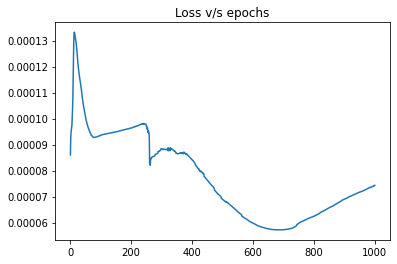

In [242]:
plt.plot(np.arange(1, 1001, 1), model.loss_over_epochs)
plt.title('Loss v/s epochs')
plt.savefig('Loss vs epochs')

In [243]:
for r, y in zip(res, y_test):
    print("True : {} \t Predicted : {}".format(ARGMAX_MAPPER[np.argmax(r)], ARGMAX_MAPPER[np.argmax(y)]))

True : GOOD 	 Predicted : BAD
True : GOOD 	 Predicted : GOOD
True : GOOD 	 Predicted : GOOD
True : GOOD 	 Predicted : GOOD
True : AVERAGE 	 Predicted : GOOD
True : GOOD 	 Predicted : GOOD
True : BAD 	 Predicted : BAD
True : GOOD 	 Predicted : BAD
True : AVERAGE 	 Predicted : GOOD
True : GOOD 	 Predicted : GOOD
True : GOOD 	 Predicted : BAD
True : AVERAGE 	 Predicted : AVERAGE
True : AVERAGE 	 Predicted : BAD
True : AVERAGE 	 Predicted : GOOD
True : AVERAGE 	 Predicted : GOOD
True : GOOD 	 Predicted : GOOD
True : GOOD 	 Predicted : GOOD
True : AVERAGE 	 Predicted : AVERAGE
True : AVERAGE 	 Predicted : AVERAGE
True : AVERAGE 	 Predicted : AVERAGE
True : GOOD 	 Predicted : AVERAGE
True : AVERAGE 	 Predicted : AVERAGE
True : GOOD 	 Predicted : GOOD
True : AVERAGE 	 Predicted : AVERAGE
True : AVERAGE 	 Predicted : AVERAGE
True : BAD 	 Predicted : BAD
True : AVERAGE 	 Predicted : AVERAGE
True : GOOD 	 Predicted : AVERAGE
True : GOOD 	 Predicted : GOOD
True : AVERAGE 	 Predicted : GOOD
True :